# For weeks, I had this idea in my mind that I wanted my final project to be related to love. 
It could be in any form, I just had to find the right data set
Also, recently I became obsessed with this media outlet called The Pudding that produces visual data-based stories -- and after investigating
their website I found a data set that would be perfect for me: Billboard's Top 100 list
Due to a trend they saw on social media where people were addressing the apparent 'death of the love song'
what they did was ask a question to the data: Is the love song dying?

Last week, I got my Spotify Wrapped and while I was not surprised at all with the result, I was a bit disappointed: in the end, it seems like
I'm just a girl after all. Lana del Rey, Ariana Grande, Taylor Swift, and obviously the brat-summer queen, Charli XCX

Also, for months, or years now, I've been seeing both on media and social media what one of my favorite podcasts called 'the imperfect feminine'
trend, which coincided a lot with my Spotify results. 

So I decided to take the same data set The Pudding used but to analyze another possible trend: When did the 'imperfect feminine' movement in music start?
And is it an actual trend after all? How did popular taste in music change over the decades?

The first step was downloading the .csv file with the Billboard data and cleaning and organizing the database - then, I had to decide how to analize which were the top songs of the year?
What was the methodology I was going to use. 
1. First, I would select the top 10 songs per month
2. Secondly, I would combine the top 10 songs of every month and, depending how many weeks each of them spent on the top 10, I would choose the Top 10 of the year
3. Clasify songs per genre

For this analysis, I used a mix of hand-work & Chat GPT
- first I sorted the data chronologically by hand, then prompted ChatGPT to sort the data from most popular songs to least based on the amount of weeks each song spent on the top of the chart

- and when I got the data sorted out, I decided to upload it to jupyter and start asking some questions


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('billboard.csv')

In [3]:
df

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart,year
0,2024-12-07,16,Lose Control,Teddy Swims,4.0,1,68,2024
1,2024-12-07,10,All I Want For Christmas Is You,Mariah Carey,16.0,1,67,2024
2,2024-12-07,15,Rockin' Around The Christmas Tree,Brenda Lee,23.0,1,60,2024
3,2024-12-07,19,Jingle Bell Rock,Bobby Helms,0.0,3,57,2024
4,2024-12-07,25,Beautiful Things,Benson Boone,9.0,2,45,2024
...,...,...,...,...,...,...,...,...
346195,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1,1958
346196,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1,1958
346197,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1,1958
346198,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1,1958


In [5]:
year_artist = df[['year', 'performer']]

In [6]:
year_artist

,year,performer
0,2024,Teddy Swims
1,2024,Mariah Carey
2,2024,Brenda Lee
3,2024,Bobby Helms
4,2024,Benson Boone
...,...,...
346195,1958,Thurston Harris
346196,1958,Robert & Johnny
346197,1958,The Ames Brothers
346198,1958,Billy Williams


- so the first thing I did was just filter by year and artist: my question was, who was the artist that had most songs in the top #100 each year since 1958?

In [8]:
year_artist = df.groupby('year')['performer'].value_counts()

In [9]:
year_artist.loc[1958]

performer
The Everly Brothers               48
Pat Boone                         46
Cozy Cole                         37
Jack Scott                        34
Ricky Nelson                      34
                                  ..
The Honeycones                     1
The McGuire Sisters                1
The Swallows                       1
Thurston Harris                    1
Wade Flemons and the Newcomers     1
Name: count, Length: 221, dtype: int64

I realized that if I had to do this manually it would take me ages, so I just decided to analyze per decade...

So... who was the top artist of each decade since the 1960s? My hypothesis was that naturally the top artists in the 60s, 70s and 80s would be men - and that pop wouldn't probably be the genre with the most songs in the top #100... but data proved me wrong! I guess?

In [13]:
year_artist.loc[1960] # when I searched for Connie Francis, I was surprised to learn she's a woman and pop artist as well

performer
Connie Francis                                             101
The Everly Brothers                                         87
Jackie Wilson                                               86
Fats Domino                                                 85
Bobby Rydell                                                84
                                                          ... 
Stan Freberg                                                 1
The Clovers                                                  1
The Drifters Featuring Clyde McPhatter And Bill Pinkney      1
The Heartbeats                                               1
Wink Martindale                                              1
Name: count, Length: 326, dtype: int64

In [24]:
year_artist.loc[1961]

performer
Connie Francis                              76
Chubby Checker                              71
Fats Domino                                 71
Brenda Lee                                  69
The Shirelles                               65
                                            ..
The Corsairs Featuring Jay "Bird" Uzzell     1
The Excels                                   1
The Five Satins                              1
The Texans                                   1
Tina Robin                                   1
Name: count, Length: 394, dtype: int64

In [14]:
year_artist.loc[1970] # man and it could be categorized as pop/rock/folk

performer
Neil Diamond               77
The 5th Dimension          55
Jackson 5                  53
James Brown                51
Elvis Presley              49
                           ..
The Jazz Crusaders          1
The Manhattans              1
The Ray Charles Singers     1
Wadsworth Mansion           1
Waylon Jennings             1
Name: count, Length: 422, dtype: int64

In [15]:
year_artist.loc[1980] # men and rock

performer
Air Supply                       60
Billy Joel                       60
Bob Seger                        57
Christopher Cross                54
Pat Benatar                      54
                                 ..
Outlaws                           1
Rainbow                           1
Richie Furay                      1
Willis "The Guard" & Vigorish     1
Yvonne Elliman                    1
Name: count, Length: 361, dtype: int64

In [16]:
year_artist.loc[1990] # woman and pop

performer
Janet Jackson           84
Phil Collins            75
Depeche Mode            62
Taylor Dayne            61
Madonna                 60
                        ..
Tracie Spencer           2
Christopher Williams     1
Chunky A                 1
Hooters                  1
Lita Ford                1
Name: count, Length: 302, dtype: int64

In [17]:
year_artist.loc[2000] # women and pop

performer
Destiny's Child            84
Faith Hill                 80
Lonestar                   79
Creed                      75
Marc Anthony               72
                           ..
Nas                         1
NewSong                     1
Shaggy Featuring Rayvon     1
Sunday                      1
Xzibit                      1
Name: count, Length: 308, dtype: int64

In [18]:
year_artist.loc[2010] # women and pop

performer
Taylor Swift                                  92
Lady Antebellum                               89
The Black Eyed Peas                           88
Ke$ha                                         86
Glee Cast                                     78
                                              ..
The Killers                                    1
Theory Of A Deadman                            1
Victorious Cast Featuring Victoria Justice     1
Will Young                                     1
k.d. lang                                      1
Name: count, Length: 357, dtype: int64

In [19]:
year_artist.loc[2020] # man and pop

performer
The Weeknd                                                104
Lil Baby                                                   99
Harry Styles                                               88
Morgan Wallen                                              86
Dua Lipa                                                   79
                                                         ... 
YoungBoy Never Broke Again Featuring DaBaby                 1
YoungBoy Never Broke Again Featuring Lil Baby               1
YoungBoy Never Broke Again Featuring Sherhonda Gaulden      1
Zac Brown Band                                              1
Zayn                                                        1
Name: count, Length: 465, dtype: int64

In [20]:
year_artist.loc[2021] # woman, pop and part of the 'imperfect feminine' movement? 

performer
Olivia Rodrigo                              172
Morgan Wallen                               100
Doja Cat                                     94
Luke Combs                                   72
The Weeknd                                   68
                                           ... 
Young Thug With J. Cole & T-Shyne             1
Young Thug With Juice WRLD                    1
Young Thug With Post Malone & A$AP Rocky      1
Yung Miami                                    1
twenty one pilots                             1
Name: count, Length: 489, dtype: int64

In [21]:
year_artist.loc[2022] # man, Latin

performer
Bad Bunny                                        148
Taylor Swift                                     121
Morgan Wallen                                    119
Harry Styles                                     107
Doja Cat                                         103
                                                ... 
XXXTENTACION                                       1
YG Featuring J. Cole & Moneybagg Yo                1
Yeat Featuring Lil Uzi Vert                        1
YoungBoy Never Broke Again & Birdman               1
YoungBoy Never Broke Again Featuring Rod Wave      1
Name: count, Length: 472, dtype: int64

In [22]:
year_artist.loc[2023] # this was surprising... I didn't know who Morgan Wallen is.

performer
Morgan Wallen                                       327
Taylor Swift                                        208
SZA                                                 177
Luke Combs                                          115
Olivia Rodrigo                                       88
                                                   ... 
Young Thug Featuring Travis Scott                     1
YoungBoy Never Broke Again & Rod Wave                 1
YoungBoy Never Broke Again Featuring Nicki Minaj      1
blink-182                                             1
j-hope With J. Cole                                   1
Name: count, Length: 455, dtype: int64

In [25]:
year_artist.loc[2024] # and 2024, definitely the 'imperfect femninine' movement reached it's peak! Taylor, Sabrina, Billie Eilish and Chappell Roan. Also, this proves my point: I'm just (proudly) just like every other girl - at least when it comes to music!

performer
Taylor Swift                                       214
Sabrina Carpenter                                  174
Billie Eilish                                      135
Chappell Roan                                      133
Zach Bryan                                          85
                                                  ... 
Vince Guaraldi Trio                                  1
Zach Bryan Featuring John Moreland                   1
mgk                                                  1
twenty one pilots                                    1
¥$: Kanye West & Ty Dolla $ign Featuring Future      1
Name: count, Length: 430, dtype: int64

After I wanted to categorize songs, but again I had to do this manually - just to see if my point was further proved, but also wondering... did this movement start in 2024? Or earlier? So I went back to my csv, edited, and uploaded it to Jupyter again - again, it was too much data just to do this manually, so I decided to reduce my time frame just to the last decade, since 2020. 

In [29]:
import pandas as pd

In [87]:
lyrics = """
Things fall apart and time breaks your heart
I wasn't there, but I know
She was your girl, you showed her the world
You fell out of love and you both let go
She was cryin' on my shoulder, all I could do was hold her
Only made us closer until July
Now I know that you love me, you don't need to remind me
I should put it all behind me, shouldn't I?
But I see her in the back of my mind
All the time
Like a fever, like I'm burning alive
Like a sign
Did I cross the line?
Mm, hm
Well, good things don't last (good things don't last)
And life moves so fast (life moves so fast)
I'd never ask who was better (I'd never ask who was better)
'Cause she couldn't be (she couldn't be)
More different from me (more different)
Happy and free (happy and free) in leather
And I know that you love me (you love me)
You don't need to remind me (remind me)
Wanna put it all behind me, but baby
I see her in the back of my mind (back of my mind)
All the time (all the time)
Feels like a fever (like a fever), like I'm burning alive (burning alive)
Like a sign
Did I cross the line?
You say no one knows you so well (oh)
But every time you touch me, I just wonder how she felt
Valentine's Day, cryin' in the hotel
I know you didn't mean to hurt me, so I kept it to myself
And I wonder
Do you see her in the back of your mind?
In my eyes?
You say no one knows you so well
But every time you touch me, I just wonder how she felt
Valentine's Day, cryin' in the hotel
I know you didn't mean to hurt me, so I kept it to myself
"""

In [88]:
words = lyrics.split()

In [89]:
df = pd.DataFrame(words, columns=['Word'])

In [90]:
df.head()

,Word
0,Things
1,fall
2,apart
3,and
4,time


In [91]:
df

,Word
0,Things
1,fall
2,apart
3,and
4,time
...,...
313,I
314,kept
315,it
316,to


In [101]:
import pandas as pd
from collections import Counter 
import string

In [170]:
lyrics = """
I don't wanna share this space
I don't wanna force a smile
This one girl taps my insecurities
Don't know if it's real or if I'm spiraling
One voice tells me that they laugh
George says, "I'm just paranoid"
Says he just don't see it, he's so naive
I'm embarrassed to have it, but need the sympathy
'Cause I couldn't even be her if I tried
I'm opposite, I'm on the other side
I feel all these feelings I can't control
Oh no, don't know why
All this sympathy is just a knife
Why I can't even grit my teeth and lie?
I feel all these feelings I can't control
Oh no, don't know
Why I wanna buy a gun?
Why I wanna shoot myself?
Volatile at war with my dialogue
I'd say that there was a God if they could stop this
Wild voice tearing me apart
I'm so apprehensive now
Don't wanna see her backstage at my boyfriend's show
Fingers crossed behind my back, I hope they break up quick
'Cause I couldn't even be her if I tried
I'm opposite, I'm on the other side
I feel all these feelings I can't control
Oh no, don't know why
All this sympathy is just a knife
Why I can't even grit my teeth and lie?
I feel all these feelings I can't control (oh no)
All this sympathy is just a knife
All this sympathy is just a lie
All this sympathy is just a knife
Yeah, all this sympathy is just a lie
Oh no, oh no
Why is all this sympathy a fucking knife?
Yeah, all this sympathy is just a lie
Couldn't even be her if I tried
Oh no, oh no
"""

In [171]:
normalized_lyrics = lyrics.translate(str.maketrans('','', string.punctuation)).lower()

In [172]:
words = normalized_lyrics.split()

In [173]:
word_counts = Counter(words)

In [174]:
df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

In [175]:
df = df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

In [176]:
df.head()

,Word,Frequency
0,i,20
1,all,12
2,this,11
3,a,11
4,just,9


In [177]:
df.head(30)

,Word,Frequency
0,i,20
1,all,12
2,this,11
3,a,11
4,just,9
5,sympathy,9
6,im,8
7,no,8
8,oh,8
9,dont,8


In [178]:
import matplotlib.pyplot as plt

In [179]:
top_20 = df.head(20)

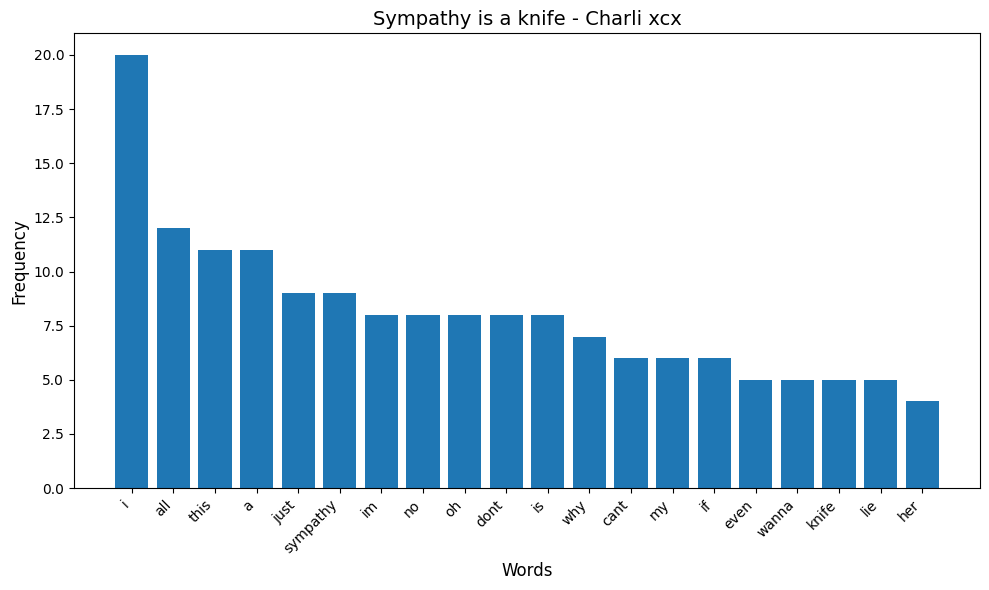

In [180]:
plt.figure(figsize=(10, 6))
plt.bar(top_20['Word'], top_20['Frequency'])
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Sympathy is a knife - Charli xcx', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()